<a href="https://colab.research.google.com/github/ericfruchi/Portfolio/blob/master/Analisando_o_jogo%2C_consumo_e_audi%C3%AAncia_do_Super_Bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando o Jogo, Consumo e Audiência do Super Bowl**

O Super Bowl vai além de apenas um jogo, vai além de ser a final da maior liga de futebol americano do mundo. Envolve muita coisa dentro e fora de campo e através desse projeto de análise de dados, vamos tentar responder algumas perguntas dividindo-o em algumas partes, cada uma delas respondendo perguntas significativas.

## 1. TV, show do intervalo, e os grandes jogos
<p>Independentemente de gostar ou não de futebol americano, o Super Bowl é um espetáculo. Há algo para todos na sua festa do Super Bowl. Drama na forma de vitórias esmagadoras, reviravoltas e controvérsias para o fã de esportes. Existem os anúncios ridiculamente caros, alguns hilariantes, outros angustiantes, provocadores de reflexão e estranhos. Os shows do intervalo com os maiores músicos do mundo, às vezes <a href="https://youtu.be/ZD1QrIe--_Y?t=14"> montando tigres mecânicos gigantes</a> ou <a href="https://youtu.be/mjrdywp5nyE?t=62">saltando do telhado do estádio</a>. É um show, baby. E neste notebook, vamos descobrir como alguns dos elementos deste show interagem entre si. Depois de explorar e limpar um pouco nossos dados, vamos responder perguntas como:</p>
<ul>
<li>Quais são os resultados de jogo mais extremos?</li>
<li>Como o jogo afeta a audiência televisiva?</li>
<li>Como a audiência, as classificações de TV e o custo dos anúncios evoluíram ao longo do tempo?</li>
<li>Quais são os músicos mais prolíficos em termos de performances no intervalo?</li>
</ul>
<p><img src="https://preview.redd.it/super-bowl-michael-jackson-performance-29-years-ago-1-31-v0-h4z9p73zewe81.jpg?width=1080&crop=smart&auto=webp&s=a4a47c8656c050c91bbc5c80949156f3a49c10d0">
<em><a href="https://www.reddit.com/r/MichaelJackson/comments/sgkd2e/super_bowl_michael_jackson_performance_29_years/">Performance de Michael Jackson no Super Bowl.</a></em></p>
<p>O conjunto de dados que usaremos foi <a href="https://en.wikipedia.org/wiki/Web_scraping">extraído</a> e refinado da Wikipedia. É composto por três arquivos CSV, um com <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">dados do jogo</a>, outro com <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">dados da TV</a> e outro com <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">dados dos artistas do intervalo</a> para todos os 52 Super Bowls até 2018.</p>

In [11]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# load CSV datasets
super_bowls = pd.read_csv("/content/super_bowls.csv")
tv = pd.read_csv("/content/tv.csv")
halftime_musicians = pd.read_csv("/content/halftime_musicians.csv")

# display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Observando problemas no conjunto de dados
<p>Para os dados do jogo do Super Bowl, podemos ver que o conjunto de dados parece completo, exceto por valores ausentes nas colunas de quarterback reserva (<code>qb_winner_2</code> e <code>qb_loser_2</code>), o que faz sentido dado que a maioria dos quarterbacks titulares no Super Bowl (<code>qb_winner_1</code> e <code>qb_loser_1</code>) jogam o jogo inteiro.</p>
<p>A partir da inspeção visual dos dados da TV e dos músicos do intervalo, há apenas um valor ausente exibido, mas tenho uma intuição de que há mais. O Super Bowl remonta a 1967, e as colunas mais granulares (por exemplo, o número de músicas para os músicos do intervalo) provavelmente não foram rastreadas de forma confiável ao longo do tempo. A Wikipedia é ótima, mas não é perfeita.</p>
<p>Uma inspeção da saída <code>.info()</code> para <code>tv</code> e <code>halftime_musicians</code> mostra que há várias colunas com valores nulos.</p>

In [ ]:
# Summary of the TV data to inspect
tv.info()

print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


## 3. Distribuição de pontos combinados
<p>Para os dados da TV, as seguintes colunas têm valores ausentes e muitos deles:</p>
<ul>
<li><code>total_us_viewers</code> (quantidade de espectadores nos EUA que assistiram pelo menos alguma parte da transmissão)</li>
<li><code>rating_18_49</code> (média % de adultos nos EUA de 18 a 49 anos que vivem em um domicílio com uma TV que estavam assistindo durante toda a transmissão)</li>
<li><code>share_18_49</code> (média % de adultos nos EUA de 18 a 49 anos que vivem em um domicílio com uma TV <em>em uso</em> que estavam assistindo durante toda a transmissão)</li>
</ul>
<p>Para os dados dos músicos do intervalo, há números ausentes de músicas executadas (<code>num_songs</code>) para cerca de um terço das apresentações.</p>
<p>Há muitas razões potenciais para esses valores ausentes. Os dados foram rastreados alguma vez? Foram perdidos na história? O esforço de pesquisa para tornar esses dados completos vale a pena? Talvez. Assistir a cada show do intervalo do Super Bowl para obter contagens de músicas seria bem divertido. Mas não temos tempo para fazer esse tipo de coisa agora! Vamos observar onde o conjunto de dados não é perfeito e começar a descobrir algumas insights.</p>

**Identificamos muitos problemas com relação a limpeza dos dados, mas o intuito desse projeto é ir direto ao ponto, assim prosseguiremos com nossa análise, há outros projetos onde foco com mais afinco com relação a limpeza dos dados.**

<p>Vamos começar olhando para os pontos combinados de cada Super Bowl visualizando a distribuição. Vamos também identificar os Super Bowls com as pontuações mais altas e mais baixas.</p>

<ipython-input-13-003357c3e0aa>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


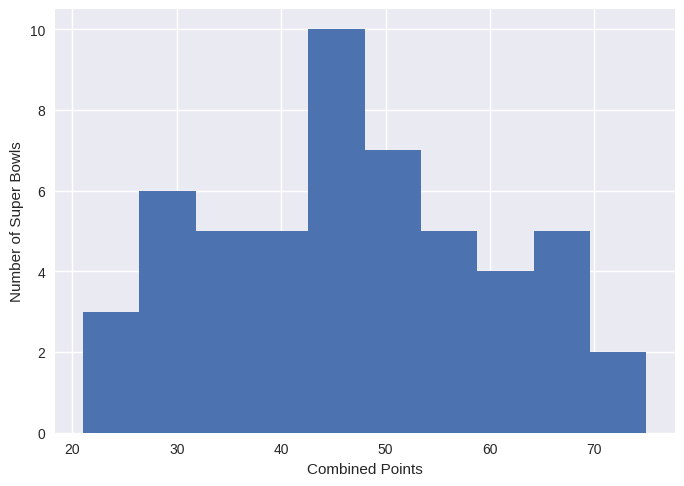

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [13]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(super_bowls["combined_pts"])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls["combined_pts"] < 25])

## 4. Distribuição da diferença de pontos
<p>A maioria dos placares combinados está em torno de 40-50 pontos, com os extremos estando aproximadamente à mesma distância em direções opostas. Indo para os placares combinados mais altos, com 74 e 75 pontos, encontramos dois jogos com performances dominantes de quarterbacks. Um deles aconteceu recentemente no Super Bowl LII de 2018, onde os Patriots de Tom Brady perderam para os Eagles azarões de Nick Foles por 41-33, resultando em um placar combinado de 74.</p>
<p>Descendo para os placares combinados mais baixos, temos o Super Bowl III e VII, que contaram com defesas sólidas que dominaram. Também temos o Super Bowl IX em Nova Orleans em 1975, cujo placar de 16-6 pode ser atribuído ao clima inclemente. O campo estava escorregadio devido à chuva durante a noite, e estava frio, com 46 °F (8 °C), dificultando a atuação ofensiva dos Steelers e Vikings. Este foi o segundo Super Bowl mais frio de todos os tempos e o último a ser disputado em condições climáticas adversas por mais de 30 anos. A NFL percebeu que as pessoas gostam de pontos, eu suponho.</p>
<p><em>ATUALIZAÇÃO: No Super Bowl LIII em 2019, os Patriots e Rams quebraram o recorde do Super Bowl com menos pontos marcados, com um placar combinado de 16 pontos (13-3 para os Patriots).</em></p>
<p>Vamos dar uma olhada na diferença de pontos agora.</p>

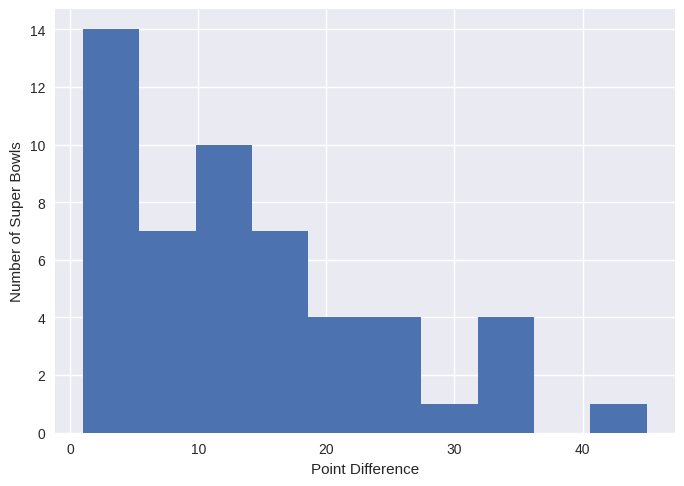

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [14]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 35])

## 5. As vitórias avassaladoras se traduzem em perda de espectadores?
<p>A grande maioria dos Super Bowls são jogos disputados. Faz sentido. Ambas as equipes provavelmente merecem estar lá se chegaram tão longe. O jogo mais equilibrado de todos os tempos foi quando o Buffalo Bills perdeu para o New York Giants por 1 ponto em 1991, que ficou mais lembrado pela tentativa de último segundo de gol de campo perdida por Scott Norwood que foi para a direita, iniciando uma série de quatro derrotas seguidas dos Bills no Super Bowl. Coitado do Scott. A maior discrepância de pontos foi de 45 pontos (!) quando o Hall da Fama Joe Montana liderou o San Francisco 49ers para a vitória em 1990, um ano antes do jogo mais equilibrado de todos os tempos.</p>
<p>Lembro-me de assistir os Seahawks esmagarem os Broncos por 35 pontos (43-8) em 2014, o que foi um jogo sem graça na minha opinião. O jogo nunca esteve realmente equilibrado. Vamos combinar nossos dados do jogo e da TV para ver se isso é um fenômeno universal. Grandes diferenças de pontos se traduzem em perda de espectadores? Podemos traçar a <a href="https://en.wikipedia.org/wiki/Nielsen_ratings">participação domiciliar</a> (percentagem média de domicílios nos EUA com uma TV em uso que estavam assistindo durante toda a transmissão) vs. diferença de pontos para descobrir.</p>

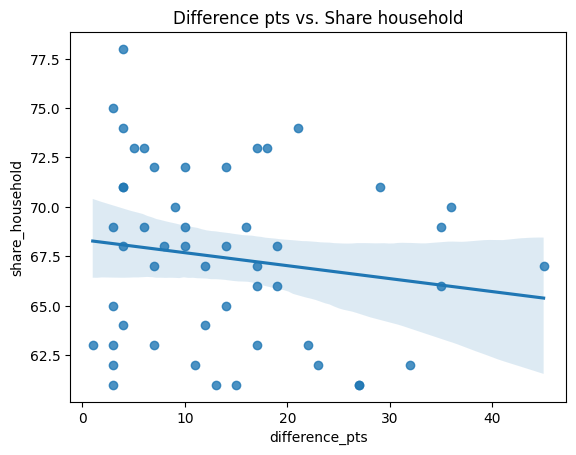

In [10]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x=games_tv['difference_pts'], y=games_tv['share_household'], data=games_tv)

# Add title
plt.title('Difference pts vs. Share household')

plt.show()


## 6. Audiência e a indústria publicitária ao longo do tempo

<p>Fica claro no gráfico que quanto maior a diferença o adversário impõe ao outro, maior é a queda de audiência.</p>
<p>A linha de regressão com inclinação descendente e o intervalo de confiança de 95% para essa regressão <em>sugerem</em> que abandonar o jogo em caso de uma vitória avassaladora é comum. Embora isso corresponda à nossa intuição, devemos encará-lo com cautela porque a relação linear nos dados é fraca devido ao nosso pequeno tamanho da amostra de 52 jogos.</p>
<p>No entanto, independentemente do placar, aposto que a maioria das pessoas permanece para assistir ao show do intervalo, o que é uma boa notícia para as redes de TV e anunciantes. Um comercial de 30 segundos custa um valor considerável de <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1">$5 milhões</a> agora, mas sempre foi assim? E como o número de espectadores e as classificações domiciliares têm se comportado em relação ao custo do anúncio? Podemos descobrir usando gráficos de linha que compartilham um eixo x de "Super Bowl".</p>

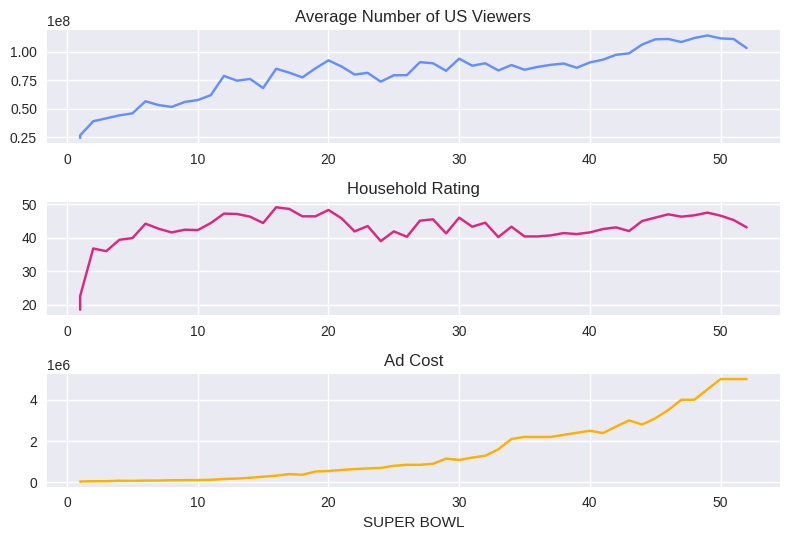

In [15]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv['super_bowl'], tv['rating_household'], color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv['super_bowl'], tv['ad_cost'], color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

## 7. Os shows do intervalo nem sempre foram tão bons assim
<p>Podemos ver que o número de espectadores aumentou antes dos custos dos anúncios. Talvez as redes não fossem muito hábeis em dados e foram lentas para reagir? Faz sentido, já que o DataCamp não existia naquela época.</p>
<p>Outra hipótese: talvez os shows do intervalo não fossem tão bons nos primeiros anos? O espetáculo moderno do Super Bowl tem muito a ver com o prestígio cultural dos grandes artistas do intervalo. Desci a toca do coelho do YouTube e descobri que os antigos não estavam à altura dos padrões de hoje. Alguns exemplos:</p>
<ul>
<li><a href="https://youtu.be/6wMXHxWO4ns?t=263">Super Bowl XXVI</a> em 1992: Um rap do Frosty The Snowman interpretado por crianças.</li>
<li><a href="https://www.youtube.com/watch?v=PKQTL1PYSag">Super Bowl XXIII</a> em 1989: Um imitador de Elvis que fazia truques de mágica e nem sequer cantava uma música de Elvis.</li>
<li><a href="https://youtu.be/oSXMNbK2e98?t=436">Super Bowl XXI</a> em 1987: Pôneis dançando sapateado. (Ok, isso é bem legal na verdade.)</li>
</ul>

**Acontece que a performance de Michael Jackson no Super Bowl XXVII, um dos eventos mais assistidos na história da TV americana, foi quando a NFL percebeu o valor do tempo de transmissão do Super Bowl e decidiu que precisavam contratar artistas de renome dali em diante. Os shows do intervalo antes de MJ realmente não impressionavam, como podemos ver filtrando nossos dados de <code>halftime_musician</code>**

In [ ]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians['super_bowl'] < 28]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## 8. Quem tem mais participações nos shows do intervalo?
<p>Muitas bandas marciais. O clarinetista de jazz americano Pete Fountain. A Miss Texas de 1973 tocando violino. Nada contra esses artistas, eles simplesmente não são <a href="https://www.youtube.com/watch?v=suIg9kTGBVI">Beyoncé</a>. Para ser justo, ninguém é.</p>
<p>Vamos ver todos os músicos que fizeram mais de um show do intervalo, incluindo o número de apresentações de cada um.</p>

In [ ]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## 9. Quem apresentou mais músicas em um show do intervalo?
<p>A famosa <a href="https://www.youtube.com/watch?v=RL_3oqpHiDg">Banda de Marcha da Universidade Estadual de Grambling</a> conquista o título com seis aparições. Beyoncé, Justin Timberlake, Nelly e Bruno Mars são os únicos músicos do pós-Y2K com múltiplas aparições (dois cada).</p>
<p>De nossas inspeções anteriores, a coluna <code>num_songs</code> tem muitos valores ausentes:</p>
<ul>
<li>Muitas das bandas de marcha não têm entradas em <code>num_songs</code>.</li>
<li>Para as bandas que não são de marcha, os dados ausentes começam a ocorrer no Super Bowl XX.</li>
</ul>
<p>Vamos filtrar as bandas de marcha filtrando os músicos com a palavra "Marching" neles e a palavra "Spirit" (uma convenção de nomenclatura comum para bandas de marcha é "Spirit of [algo]"). Em seguida, vamos filtrar os Super Bowls após o Super Bowl XX para resolver o problema dos dados ausentes, <em>então</em> vamos ver quem tem o maior número de músicas.</p>

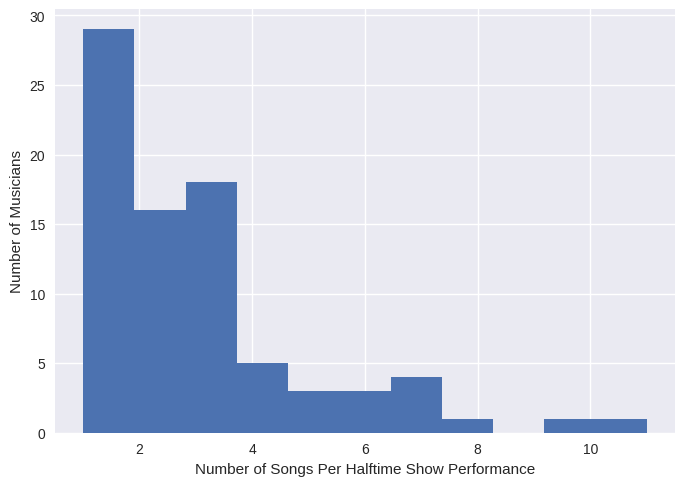

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [16]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

## 10. Conclusão
<p>Portanto, a maioria dos músicos não ligados a bandas realiza de 1 a 3 músicas por show do intervalo. É importante observar que a duração do show do intervalo é fixa (aproximadamente 12 minutos), apesar desse tempo ter aumentado nos últimos anos, então o número de músicas por apresentação é mais uma medida de quantas músicas de sucesso você tem:

  * Justin Timberlake arrasou em 2018, uau. 11 músicas!
  * Diana Ross fica em segundo lugar com 10 em seu medley em 1996.</p>

<p>Neste notebook, carregamos, limpamos(de forma leve) e exploramos os dados do jogo do Super Bowl, da televisão e do show do intervalo.

Visualizamos as distribuições de pontos combinados, diferenças de pontos e performances do show do intervalo usando histogramas. Usamos gráficos de linha para ver como o aumento do custo do anúncio ficou atrás do aumento da audiência. E descobrimos que as vitórias avassaladoras parecem levar a uma queda na audiência.</p>

<p>Para concluir nosso projeto, essa temporada tivemos um grande Super Bowl, Kansas City Chiefs e San Fracisco 49ers que também fizeram o Super Bowl de LIV, 4 anos atrás, realizaram uma grande partida e descobrir quem foi o campeão logo abaixo. </p>
<p><em>ATUALIZAÇÃO: <a href="https://pt.wikipedia.org/wiki/Super_Bowl_LVIII">Alerta de spoiler</a>.</em></p>

In [ ]:
# campeões de conferência - NFL temporada 2023
AFC = 'Kansas City Chiefs'
NFC = 'San Francisco 49ers'

# Quem venceu o Super Bowl LVIII?
super_bowl_LVIII_winner = AFC
print('O campeão do Super Bowl LVIII foi o:', super_bowl_LVIII_winner)

O campeão do Super Bowl LVIII foi o: Kansas City Chiefs


Este notebook não teve como objetivo desenvolver modelos, mas sim extrair insights que respondessem às perguntas levantadas no início da análise.

Ele foi gerado a partir de um projeto Python disponível na plataforma DataCamp, intitulado 'Analyzing TV Data'. Após a conclusão do projeto, o adaptei da minha maneira, adicionei scripts, gráficos e storytelling que considerei pertinentes, além de remover scripts que julguei menos relevantes.

Curtiu? Você pode encontrar mais projetos como esse em meu [LinkedIn](https://www.linkedin.com/in/ericfruchi/).